### 1. Análise Exploratória de Dados

In [64]:
#importando as principais bibliotecas 

import pandas as pd 

import seaborn as sns 
import matplotlib.pyplot as plt

from matplotlib.patches import Patch
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

from shapely.geometry import Point
import geopandas as gpd
from geopandas.tools import sjoin



In [2]:
#efetuando a importação dos dados

df_eleitoral = pd.read_csv(r'C:\Users\cesar\Downloads\projeto_eleicao_2022\perfil_eleitorado_2022\perfil_eleitor_secao_2022_BA.csv', sep=";", encoding="latin-1" )


In [3]:
#visualizando as primeiras linhas

df_eleitoral.head(10)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,CD_MUN_SIT_BIOMETRICA,DS_MUN_SIT_BIOMETRICA,NR_ZONA,NR_SECAO,...,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_BIOMETRIA,QT_ELEITORES_DEFICIENCIA,QT_ELEITORES_INC_NM_SOCIAL
0,12/07/2022,08:31:45,2022,BA,39411,UBAÍRA,1,Biométrico,38,111,...,1,SOLTEIRO,5054,50 a 54 anos,4,ENSINO FUNDAMENTAL COMPLETO,1,0,0,0
1,12/07/2022,08:31:45,2022,BA,39411,UBAÍRA,1,Biométrico,38,111,...,1,SOLTEIRO,5559,55 a 59 anos,1,ANALFABETO,2,2,0,0
2,12/07/2022,08:31:45,2022,BA,39411,UBAÍRA,1,Biométrico,38,111,...,1,SOLTEIRO,5559,55 a 59 anos,2,LÊ E ESCREVE,3,3,0,0
3,12/07/2022,08:31:45,2022,BA,39411,UBAÍRA,1,Biométrico,38,111,...,1,SOLTEIRO,5559,55 a 59 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,1,1,0,0
4,12/07/2022,08:31:45,2022,BA,39411,UBAÍRA,1,Biométrico,38,111,...,1,SOLTEIRO,6064,60 a 64 anos,1,ANALFABETO,2,2,0,0
5,12/07/2022,08:31:45,2022,BA,39411,UBAÍRA,1,Biométrico,38,111,...,1,SOLTEIRO,6064,60 a 64 anos,2,LÊ E ESCREVE,3,2,0,0
6,12/07/2022,08:31:45,2022,BA,39411,UBAÍRA,1,Biométrico,38,111,...,1,SOLTEIRO,6064,60 a 64 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,1,0,0,0
7,12/07/2022,08:31:45,2022,BA,39411,UBAÍRA,1,Biométrico,38,111,...,1,SOLTEIRO,6569,65 a 69 anos,1,ANALFABETO,2,2,0,0
8,12/07/2022,08:31:45,2022,BA,39411,UBAÍRA,1,Biométrico,38,111,...,1,SOLTEIRO,6569,65 a 69 anos,2,LÊ E ESCREVE,1,1,0,0
9,12/07/2022,08:31:45,2022,BA,39411,UBAÍRA,1,Biométrico,38,111,...,1,SOLTEIRO,7074,70 a 74 anos,1,ANALFABETO,1,0,0,0


In [4]:
#verificando o número de linhas e colunas

df_eleitoral.shape

(5499206, 23)

In [5]:
#principais informações do df

df_eleitoral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5499206 entries, 0 to 5499205
Data columns (total 23 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   DT_GERACAO                  object
 1   HH_GERACAO                  object
 2   ANO_ELEICAO                 int64 
 3   SG_UF                       object
 4   CD_MUNICIPIO                int64 
 5   NM_MUNICIPIO                object
 6   CD_MUN_SIT_BIOMETRICA       int64 
 7   DS_MUN_SIT_BIOMETRICA       object
 8   NR_ZONA                     int64 
 9   NR_SECAO                    int64 
 10  NR_LOCAL_VOTACAO            int64 
 11  CD_GENERO                   int64 
 12  DS_GENERO                   object
 13  CD_ESTADO_CIVIL             int64 
 14  DS_ESTADO_CIVIL             object
 15  CD_FAIXA_ETARIA             int64 
 16  DS_FAIXA_ETARIA             object
 17  CD_GRAU_ESCOLARIDADE        int64 
 18  DS_GRAU_ESCOLARIDADE        object
 19  QT_ELEITORES_PERFIL         int64 
 20  QT

In [6]:
#principais estatisticas descritivas do df

df_eleitoral.describe()

,ANO_ELEICAO,CD_MUNICIPIO,CD_MUN_SIT_BIOMETRICA,NR_ZONA,NR_SECAO,NR_LOCAL_VOTACAO,CD_GENERO,CD_ESTADO_CIVIL,CD_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_BIOMETRIA,QT_ELEITORES_DEFICIENCIA,QT_ELEITORES_INC_NM_SOCIAL
count,5499206.0,5.499206e+06,5499206.0,5.499206e+06,5.499206e+06,5.499206e+06,5.499206e+06,5.499206e+06,5.499206e+06,5.499206e+06,5.499206e+06,5.499206e+06,5.499206e+06,5.499206e+06
mean,2022.0,3.663626e+04,1.0,9.262676e+01,1.836726e+02,1.288417e+03,3.058543e+00,2.321653e+00,4.661700e+03,4.226576e+00,2.053302e+00,1.811630e+00,1.141474e-02,4.898889e-04
std,0.0,2.282752e+03,0.0,6.134737e+01,1.601314e+02,3.000448e+02,9.987745e-01,1.994034e+00,1.860373e+03,2.099564e+00,2.051505e+00,1.995614e+00,1.083050e-01,2.222641e-02
min,2022.0,3.000700e+04,1.0,1.000000e+00,1.000000e+00,1.015000e+03,0.000000e+00,0.000000e+00,-3.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2022.0,3.507600e+04,1.0,3.700000e+01,6.500000e+01,1.066000e+03,2.000000e+00,1.000000e+00,3.034000e+03,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,2022.0,3.687000e+04,1.0,8.700000e+01,1.380000e+02,1.171000e+03,4.000000e+00,1.000000e+00,4.549000e+03,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,2022.0,3.849000e+04,1.0,1.500000e+02,2.530000e+02,1.414000e+03,4.000000e+00,3.000000e+00,6.064000e+03,6.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
max,2022.0,3.999300e+04,1.0,2.050000e+02,9.430000e+02,3.581000e+03,4.000000e+00,9.000000e+00,9.999000e+03,8.000000e+00,8.900000e+01,8.900000e+01,5.000000e+00,2.000000e+00


In [7]:
#visualizando colunas no df

df_eleitoral.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'SG_UF', 'CD_MUNICIPIO',
       'NM_MUNICIPIO', 'CD_MUN_SIT_BIOMETRICA', 'DS_MUN_SIT_BIOMETRICA',
       'NR_ZONA', 'NR_SECAO', 'NR_LOCAL_VOTACAO', 'CD_GENERO', 'DS_GENERO',
       'CD_ESTADO_CIVIL', 'DS_ESTADO_CIVIL', 'CD_FAIXA_ETARIA',
       'DS_FAIXA_ETARIA', 'CD_GRAU_ESCOLARIDADE', 'DS_GRAU_ESCOLARIDADE',
       'QT_ELEITORES_PERFIL', 'QT_ELEITORES_BIOMETRIA',
       'QT_ELEITORES_DEFICIENCIA', 'QT_ELEITORES_INC_NM_SOCIAL'],
      dtype='object')

In [8]:
#criando função para visualizar os valores únicos e/ou nulos por colunas (ter o pandas importado)

def valores_unicos(df):

    for colunas in df.columns:
        print(f'Coluna {colunas}:')
        contar_valores = df[colunas].value_counts(dropna=False)
        porcentagem_valores = df[colunas].value_counts(dropna=False, normalize=True) * 100
        resultado_valores = pd.concat([contar_valores, porcentagem_valores], axis=1, 
                                     keys=['Qnt', 'Porcentagem'])
        print(resultado_valores)

        print(f'Valores nulos: {df[colunas].isnull().sum()}')
        print('\n')

valores_unicos(df_eleitoral)

Coluna DT_GERACAO:
                Qnt  Porcentagem
DT_GERACAO                      
12/07/2022  5499206        100.0
Valores nulos: 0


Coluna HH_GERACAO:
                Qnt  Porcentagem
HH_GERACAO                      
08:31:45    5499206        100.0
Valores nulos: 0


Coluna ANO_ELEICAO:
                 Qnt  Porcentagem
ANO_ELEICAO                      
2022         5499206        100.0
Valores nulos: 0


Coluna SG_UF:
           Qnt  Porcentagem
SG_UF                      
BA     5499206        100.0
Valores nulos: 0


Coluna CD_MUNICIPIO:
                 Qnt  Porcentagem
CD_MUNICIPIO                     
38490         856334    15.571957
35157         201057     3.656110
39659         123998     2.254835
34134          84643     1.539186
35971          81980     1.490761
...              ...          ...
34894           2279     0.041442
35530           2102     0.038224
34479           2069     0.037624
36757           2035     0.037005
36811           1961     0.035660

[417

In [9]:
#criando função para gerar gráfico em barras para a visualização dos valores por coluna

def visualizar_barras (coluna, df):

    valores_totais = len(df[coluna])
    contador_valores = df[coluna].value_counts(dropna=False)
    porcentagem_valores = (contador_valores/valores_totais) * 100

    porcentagem_valores.plot(kind='bar')
    plt.title(f'Dados referentes a coluna: {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('%')
    plt.show

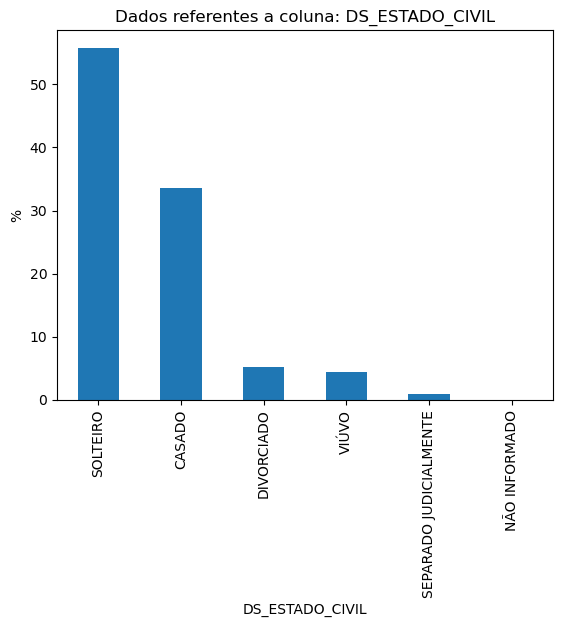

In [10]:
visualizar_barras('DS_ESTADO_CIVIL', df_eleitoral)

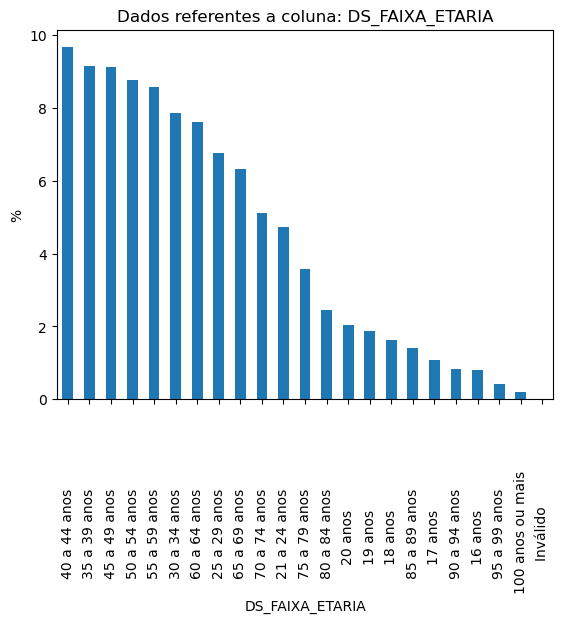

In [11]:
visualizar_barras('DS_FAIXA_ETARIA', df_eleitoral)

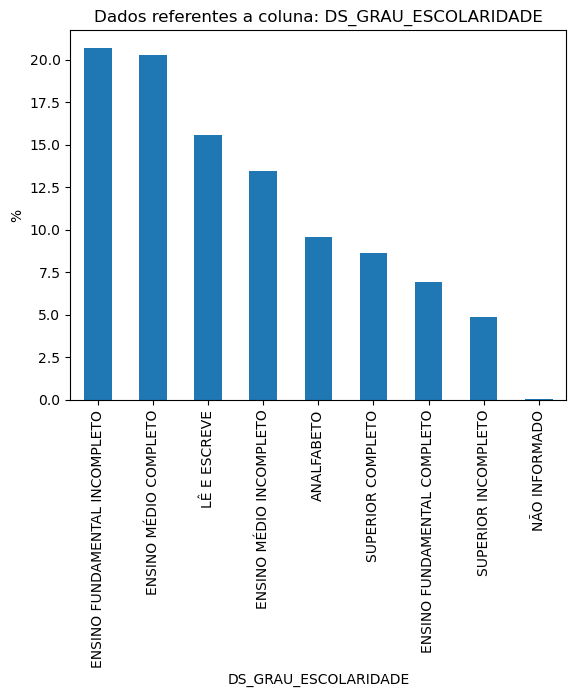

In [12]:
visualizar_barras('DS_GRAU_ESCOLARIDADE', df_eleitoral)

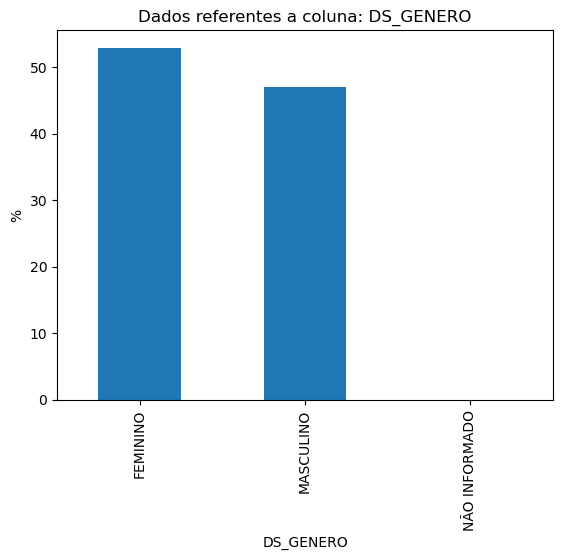

In [13]:
visualizar_barras('DS_GENERO', df_eleitoral)

### 2. Tratando dataframe eleitoral

In [14]:
#criando uma cópia do dataframe antes do tratamento 

df_tratado = df_eleitoral.copy()


In [15]:
#tratando os valores nulos (#NULO, #NE, -1 ou -3, assim como descrito no material do TSE)

df_tratado.replace({'#NULO': None, '#NE': None, '-1': None, '-3': None}, inplace= True)

In [16]:
df_tratado.head(5)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,CD_MUN_SIT_BIOMETRICA,DS_MUN_SIT_BIOMETRICA,NR_ZONA,NR_SECAO,...,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_BIOMETRIA,QT_ELEITORES_DEFICIENCIA,QT_ELEITORES_INC_NM_SOCIAL
0,12/07/2022,08:31:45,2022,BA,39411,UBAÍRA,1,Biométrico,38,111,...,1,SOLTEIRO,5054,50 a 54 anos,4,ENSINO FUNDAMENTAL COMPLETO,1,0,0,0
1,12/07/2022,08:31:45,2022,BA,39411,UBAÍRA,1,Biométrico,38,111,...,1,SOLTEIRO,5559,55 a 59 anos,1,ANALFABETO,2,2,0,0
2,12/07/2022,08:31:45,2022,BA,39411,UBAÍRA,1,Biométrico,38,111,...,1,SOLTEIRO,5559,55 a 59 anos,2,LÊ E ESCREVE,3,3,0,0
3,12/07/2022,08:31:45,2022,BA,39411,UBAÍRA,1,Biométrico,38,111,...,1,SOLTEIRO,5559,55 a 59 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,1,1,0,0
4,12/07/2022,08:31:45,2022,BA,39411,UBAÍRA,1,Biométrico,38,111,...,1,SOLTEIRO,6064,60 a 64 anos,1,ANALFABETO,2,2,0,0


In [17]:
#verificando o número de linhas do df_tratado

df_tratado.shape

(5499206, 23)

### 3. Dados geoespaciais dos muninicipios da Bahia

In [18]:
#visualizando dados do nosso arquivo SHP que contém dados geoespaciais da divisão político-administrativa da bahia

df_geoespacial = gpd.read_file(r'C:\Users\cesar\Downloads\projeto_eleicao_2022\DIVISAO_POLITICO_ADMINISTRATIVA_2017_06_14\DPA_A_100K_2017_06_14_GCS_SIR_SEI.shp')

print(df_geoespacial.head(5))

     MUNICIPIO   Codigo                                           geometry
0  Nova Viçosa  2923001  POLYGON ((-39.70855 -17.77303, -39.70812 -17.7...
1       Mucuri  2922003  POLYGON ((-40.21221 -17.73048, -40.21085 -17.7...
2     Ibirapoã  2912806  POLYGON ((-40.14385 -17.62265, -40.14350 -17.6...
3    Caravelas  2906907  POLYGON ((-40.22508 -17.40671, -40.22353 -17.4...
4      Lajedão  2918902  POLYGON ((-40.32401 -17.39604, -40.32253 -17.3...


In [19]:
df_geoespacial.columns

Index(['MUNICIPIO', 'Codigo', 'geometry'], dtype='object')

In [20]:
valores_unicos(df_geoespacial)

Coluna MUNICIPIO:
                     Qnt  Porcentagem
MUNICIPIO                            
Nova Viçosa            1     0.239808
Nova Redenção          1     0.239808
Angical                1     0.239808
Candeal                1     0.239808
Bonito                 1     0.239808
...                  ...          ...
Barra da Estiva        1     0.239808
Taperoá                1     0.239808
Wenceslau Guimarães    1     0.239808
Coribe                 1     0.239808
Curaçá                 1     0.239808

[417 rows x 2 columns]
Valores nulos: 0


Coluna Codigo:
         Qnt  Porcentagem
Codigo                   
2923001    1     0.239808
2922854    1     0.239808
2901403    1     0.239808
2906402    1     0.239808
2904050    1     0.239808
...      ...          ...
2902807    1     0.239808
2931202    1     0.239808
2933505    1     0.239808
2909109    1     0.239808
2909901    1     0.239808

[417 rows x 2 columns]
Valores nulos: 0


Coluna geometry:
                                

In [21]:
#verificando o número de municípios únicos em cada df
num_municipios_geoespacial = df_geoespacial['MUNICIPIO'].nunique()
num_municipios_eleitoral = df_eleitoral['NM_MUNICIPIO'].nunique()

print(num_municipios_eleitoral)
print(num_municipios_geoespacial)


417
417


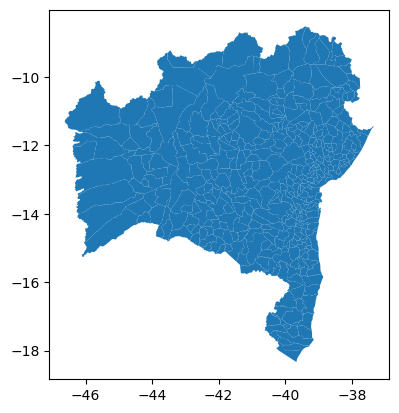

In [22]:
df_geoespacial.plot()

plt.show()

In [23]:
#verificando os tipos de variáveis no df_geoespacial

df_geoespacial.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   MUNICIPIO  417 non-null    object  
 1   Codigo     417 non-null    object  
 2   geometry   417 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 9.9+ KB


### 4. Tratando os dados geoespaciais e unindo o df_tratado e o df_geoespacial 

In [24]:
#tratando os dataframes antes de os unir

df_tratado['NM_MUNICIPIO'] = df_tratado['NM_MUNICIPIO'].str.upper()
df_geoespacial['MUNICIPIO'] = df_geoespacial['MUNICIPIO'].str.upper()

#obtendo uma lista dos nomes únicos de municípios em cada df

nomes_municipios_tratado = df_tratado['NM_MUNICIPIO'].unique()
nomes_municipios_geoespacial = df_geoespacial['MUNICIPIO'].unique()

#comparando as listas para identificar as diferenças nos nomes dos municípios

municipios_unicos_dftratado = set(nomes_municipios_tratado) - set(nomes_municipios_geoespacial)
municipios_unicos_df_geoespacial = set(nomes_municipios_geoespacial) - set(nomes_municipios_tratado)


print("municipios df_tratado:")
print(municipios_unicos_dftratado)
print()
print("municipios df_geoespacial")
print(municipios_unicos_df_geoespacial)


municipios df_tratado:
{'ITAETÉ', 'IBIRAPUÃ', 'LAFAIETE COUTINHO', 'PAU BRASIL', 'SANTO ESTEVÃO', 'CAEM', 'CAMACÃ'}

municipios df_geoespacial
{'PAU-BRASIL', 'CAÉM', 'LAFAYETTE COUTINHO', 'SANTO ESTÊVÃO', 'ITAETÊ', 'CAMACAN', 'IBIRAPOÃ'}


In [25]:
#dicionário para substituir o nome dos municipios do df_geoespacial pelo df_tratado

troca_municipios = {
    'IBIRAPOÃ': 'IBIRAPUÃ',
    'SANTO ESTÊVÃO': 'SANTO ESTEVÃO',
    'PAU-BRASIL': 'PAU BRASIL',
    'ITAETÊ': 'ITAETÉ',
    'CAMACAN': 'CAMACÃ',
    'LAFAYETTE COUTINHO': 'LAFAIETE COUTINHO',
    'CAÉM': 'CAEM'
}

#substindo o nome dos municipios

df_geoespacial['MUNICIPIO'].replace(troca_municipios, inplace=True)

In [26]:
#verificando novamente a lista dos nomes únicos de municípios em cada df

nomes_municipios_tratado = df_tratado['NM_MUNICIPIO'].unique()
nomes_municipios_geoespacial = df_geoespacial['MUNICIPIO'].unique()

#comparando as listas para identificar as diferenças nos nomes dos municípios

municipios_unicos_dftratado = set(nomes_municipios_tratado) - set(nomes_municipios_geoespacial)
municipios_unicos_df_geoespacial = set(nomes_municipios_geoespacial) - set(nomes_municipios_tratado)


print("municipios df_tratado:")
print(municipios_unicos_dftratado)
print()
print("municipios df_geoespacial")
print(municipios_unicos_df_geoespacial)

municipios df_tratado:
set()

municipios df_geoespacial
set()


In [27]:
#unindo os dataframe df_geoespacial e df_tratado
df_bahia = pd.merge(df_geoespacial, df_tratado, left_on='MUNICIPIO', right_on='NM_MUNICIPIO', how='left')

#visualizando o df_bahia 
df_bahia.head()

,MUNICIPIO,Codigo,geometry,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,CD_MUN_SIT_BIOMETRICA,...,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_BIOMETRIA,QT_ELEITORES_DEFICIENCIA,QT_ELEITORES_INC_NM_SOCIAL
0,NOVA VIÇOSA,2923001,"POLYGON ((-39.70855 -17.77303, -39.70812 -17.7...",12/07/2022,08:31:45,2022,BA,37613,NOVA VIÇOSA,1,...,3,CASADO,5054,50 a 54 anos,6,ENSINO MÉDIO COMPLETO,1,1,0,0
1,NOVA VIÇOSA,2923001,"POLYGON ((-39.70855 -17.77303, -39.70812 -17.7...",12/07/2022,08:31:45,2022,BA,37613,NOVA VIÇOSA,1,...,3,CASADO,5559,55 a 59 anos,1,ANALFABETO,1,1,0,0
2,NOVA VIÇOSA,2923001,"POLYGON ((-39.70855 -17.77303, -39.70812 -17.7...",12/07/2022,08:31:45,2022,BA,37613,NOVA VIÇOSA,1,...,3,CASADO,5559,55 a 59 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,1,1,0,0
3,NOVA VIÇOSA,2923001,"POLYGON ((-39.70855 -17.77303, -39.70812 -17.7...",12/07/2022,08:31:45,2022,BA,37613,NOVA VIÇOSA,1,...,3,CASADO,5559,55 a 59 anos,6,ENSINO MÉDIO COMPLETO,2,2,0,0
4,NOVA VIÇOSA,2923001,"POLYGON ((-39.70855 -17.77303, -39.70812 -17.7...",12/07/2022,08:31:45,2022,BA,37613,NOVA VIÇOSA,1,...,3,CASADO,5559,55 a 59 anos,8,SUPERIOR COMPLETO,1,1,0,0


In [28]:
#comparando o número de linhas no df_bahia e no df_eleitoral

print(df_bahia.shape)

print(df_eleitoral.shape)


(5499206, 26)
(5499206, 23)


In [29]:
#verificando o número de municipios

df_bahia_municipios = df_bahia['NM_MUNICIPIO'].nunique()

print(df_bahia_municipios)

417


In [30]:
#contador de quantas linhas que não coincidem entre as colunas MUNICIPIO e NM_MUNICIPIO

linhas_nao_coincidentes = (df_bahia['MUNICIPIO'] != df_bahia['NM_MUNICIPIO']).sum()

print(linhas_nao_coincidentes)


0


In [31]:
#excluindo as colunas MUNICIPIO e Codigo, mantendo a coluna NM_MUNICIPIO
df_bahia = df_bahia.drop(columns=['MUNICIPIO', 'Codigo'])

#renomeando a coluna geometry para GEOMETRY
df_bahia = df_bahia.rename(columns={'geometry': 'GEOMETRY'})

#inserindo a coluna GEOMETRY para a posição 6 para ficar ao lado da coluna NM_MUNICIPIO
df_bahia.insert(6, 'GEOMETRY', df_bahia.pop('GEOMETRY'))


df_bahia.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,GEOMETRY,CD_MUN_SIT_BIOMETRICA,DS_MUN_SIT_BIOMETRICA,NR_ZONA,...,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_BIOMETRIA,QT_ELEITORES_DEFICIENCIA,QT_ELEITORES_INC_NM_SOCIAL
0,12/07/2022,08:31:45,2022,BA,37613,NOVA VIÇOSA,"POLYGON ((-39.70855 -17.77303, -39.70812 -17.7...",1,Biométrico,35,...,3,CASADO,5054,50 a 54 anos,6,ENSINO MÉDIO COMPLETO,1,1,0,0
1,12/07/2022,08:31:45,2022,BA,37613,NOVA VIÇOSA,"POLYGON ((-39.70855 -17.77303, -39.70812 -17.7...",1,Biométrico,35,...,3,CASADO,5559,55 a 59 anos,1,ANALFABETO,1,1,0,0
2,12/07/2022,08:31:45,2022,BA,37613,NOVA VIÇOSA,"POLYGON ((-39.70855 -17.77303, -39.70812 -17.7...",1,Biométrico,35,...,3,CASADO,5559,55 a 59 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,1,1,0,0
3,12/07/2022,08:31:45,2022,BA,37613,NOVA VIÇOSA,"POLYGON ((-39.70855 -17.77303, -39.70812 -17.7...",1,Biométrico,35,...,3,CASADO,5559,55 a 59 anos,6,ENSINO MÉDIO COMPLETO,2,2,0,0
4,12/07/2022,08:31:45,2022,BA,37613,NOVA VIÇOSA,"POLYGON ((-39.70855 -17.77303, -39.70812 -17.7...",1,Biométrico,35,...,3,CASADO,5559,55 a 59 anos,8,SUPERIOR COMPLETO,1,1,0,0


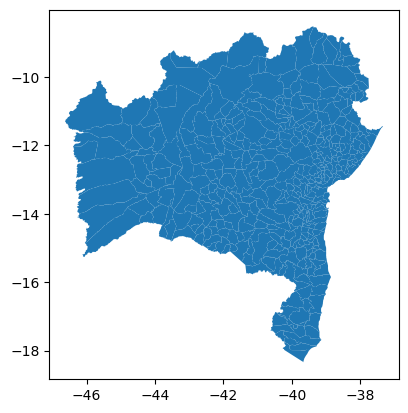

In [32]:
#verificando os polígonos no dataset após o tratamento

df_municipio_agrupado = df_bahia.groupby('NM_MUNICIPIO').first().reset_index()

gdf_municipio_agrupado = gpd.GeoDataFrame(df_municipio_agrupado, geometry='GEOMETRY')

gdf_municipio_agrupado.plot()

plt.show()

### 5. Visualizações geoespaciais

In [33]:
#verificando as colunas para começar as visualizações

df_bahia.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'SG_UF', 'CD_MUNICIPIO',
       'NM_MUNICIPIO', 'GEOMETRY', 'CD_MUN_SIT_BIOMETRICA',
       'DS_MUN_SIT_BIOMETRICA', 'NR_ZONA', 'NR_SECAO', 'NR_LOCAL_VOTACAO',
       'CD_GENERO', 'DS_GENERO', 'CD_ESTADO_CIVIL', 'DS_ESTADO_CIVIL',
       'CD_FAIXA_ETARIA', 'DS_FAIXA_ETARIA', 'CD_GRAU_ESCOLARIDADE',
       'DS_GRAU_ESCOLARIDADE', 'QT_ELEITORES_PERFIL', 'QT_ELEITORES_BIOMETRIA',
       'QT_ELEITORES_DEFICIENCIA', 'QT_ELEITORES_INC_NM_SOCIAL'],
      dtype='object')

##### Vamos começar nossa análise pelo gênero dos eleitores baianos

In [67]:
#gerando a associação entre os códigos e as descrições de gênero
genero_associacao = df_bahia[['CD_GENERO', 'DS_GENERO']].drop_duplicates().reset_index(drop=True)

print(genero_associacao)


   CD_GENERO      DS_GENERO
0          4       FEMININO
1          2      MASCULINO
2          0  NÃO INFORMADO


In [35]:
#agrupando os dados pelo nome do município e calculando a moda dos gêneros
moda_genero_bahia = df_bahia.groupby('NM_MUNICIPIO').agg({'CD_GENERO': lambda x: x.mode()[0], 
                                                          'DS_GENERO': lambda x: x.mode()[0], 
                                                          'GEOMETRY': 'first'}).reset_index()


#criando novo df com a moda dos gêneros por município
df_ModaGenero_bahia = moda_genero_bahia.reset_index()

#criando o GeoDataFrame com a moda dos gêneros por município
gdf_ModaGenero_bahia = gpd.GeoDataFrame(df_ModaGenero_bahia, geometry='GEOMETRY')

print(gdf_ModaGenero_bahia.head())


   index NM_MUNICIPIO  CD_GENERO DS_GENERO  \
0      0        ABARÉ          4  FEMININO   
1      1       ABAÍRA          4  FEMININO   
2      2    ACAJUTIBA          4  FEMININO   
3      3     ADUSTINA          4  FEMININO   
4      4      AIQUARA          4  FEMININO   

                                            GEOMETRY  
0  POLYGON ((-39.35347 -8.54508, -39.34996 -8.548...  
1  POLYGON ((-41.65334 -13.16869, -41.65311 -13.1...  
2  POLYGON ((-38.04970 -11.58322, -38.04949 -11.5...  
3  POLYGON ((-37.99556 -10.43288, -37.99529 -10.4...  
4  POLYGON ((-39.86975 -14.01162, -39.86732 -14.0...  


C:\Users\cesar\AppData\Local\Temp\ipykernel_7340\3761896076.py:15: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  gdf_ModaGenero_bahia[gdf_ModaGenero_bahia['DS_GENERO'] == genero].plot(ax=ax, color=cor,


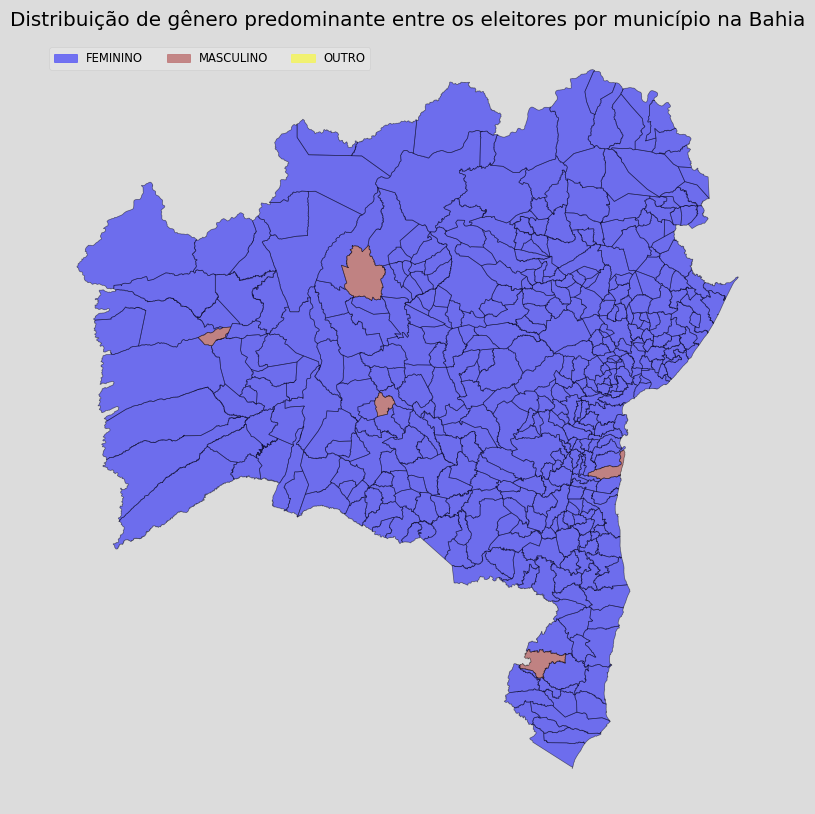

In [62]:
#gerando gráfico de gênero predominante por município

cores_genero = {'FEMININO': 'blue', 'MASCULINO': 'brown', 'OUTRO': 'yellow'}

fig, ax = plt.subplots(figsize=(10, 10))
# ax.set_facecolor('gainsboro')

#definindo os limites do mapa

minx, miny, maxx, maxy = gdf_ModaGenero_bahia.total_bounds
ax.set_xlim(minx - 0.5, maxx + 0.5)
ax.set_ylim(miny - 0.5, maxy + 0.5)

for genero, cor in cores_genero.items():
    gdf_ModaGenero_bahia[gdf_ModaGenero_bahia['DS_GENERO'] == genero].plot(ax=ax, color=cor,
                                                                           label=genero,
                                                                           edgecolor='black',
                                                                           linewidth=0.5,
                                                                           alpha=0.5)

#removendo os rótulos dos eixos

ax.set_xticks([])
ax.set_yticks([])

#lista de patches para a legenda

patches_legenda = [Patch(color=mcolors.to_rgba(color, alpha=0.5), label=label) for label, color in cores_genero.items()]

#adicionando legenda e título

plt.legend(handles=patches_legenda, loc='upper center', bbox_to_anchor=(0.23, 0.99), shadow=False, ncol=3,
           fontsize='small')

plt.title(f'Distribuição de gênero predominante entre os eleitores por município na Bahia')

#remove a moldura
ax.set_frame_on(False)

fig.patch.set_facecolor('gainsboro')

plt.show() 


In [68]:
#filtrando os municípios em que o gênero masculino é predominante
municipios_masculino = moda_genero_bahia[moda_genero_bahia['DS_GENERO'] == 'MASCULINO']

print("Municípios em que o gênero masculino é predominante:")
for municipio in municipios_masculino['NM_MUNICIPIO']:
    print(municipio)


Municípios em que o gênero masculino é predominante:
CATOLÂNDIA
CATURAMA
GENTIO DO OURO
JUCURUÇU
MARAÚ
